In [1]:
from kitaev import *
from tqdm import tqdm

In [2]:
#plt.style.available

In [3]:
plt.style.use(["default",'seaborn-v0_8-poster','normal_font.mplstyle'])

In [26]:
t = torch.tensor(1.0)
N_global = 100
d_global = 2
mu1 = 0 * t
#mu2 = 6.5 * t
mu2 = 3 * t
delta1 = 1 * t
delta2 = 1 * t
t1 = 1 * t
t2 = 1 * t
h_1 = Hamiltonian(d=d_global, N=N_global, u=onsite(_mu=mu1), v=offsite(_delta=delta1, _t=t1))
h_2 = Hamiltonian(d=d_global, N=N_global, u=onsite(_mu=mu2), v=offsite(_delta=delta2, _t=t2))

var_T = torch.linspace(0.2, 5, 251)
var_w = torch.linspace(-1.2, 1.2, 241)
#var_w=[0]
fs_odd1 = []
fs_bulk_odd1 = []
fs_odd2 = []
fs_bulk_odd2 = []
energiesv2 = []
delta_amount =  1E-5
#delta_amount = 0.001


for j in tqdm(range(len(var_T))):
    eval1, evec1 = floquet_hamiltonian([(3/4)*h_2.lattice_hamiltonian(), (3/2)*h_1.lattice_hamiltonian(),(3/4)*h_2.lattice_hamiltonian()], T=var_T[j])
    eval2, evec2 = floquet_hamiltonian([(3/4)*h_1.lattice_hamiltonian(), (3/2)*h_2.lattice_hamiltonian(),(3/4)*h_1.lattice_hamiltonian()], T=var_T[j])

    eval1 = eval1.real
    eval2 = eval2.real

    # Convert eval1 and eval2 to PyTorch tensors
    #eval1 = torch.tensor(eval1)
    energiesv2.append(np.sort([(-1) ** n * val for n, val in enumerate(np.sort(np.abs(eval1.cpu())))]))
    #eval2 = torch.tensor(eval2)
    evec1_inv = la.inv(evec1)
    evec2_inv = la.inv(evec2)

    G_odd1 = []
    G_odd_bulk1 = []
    G_odd2 = []
    G_odd_bulk2 = []

    for w in (var_w):
        delta_positive = (w + delta_amount * 1j) 
        delta_negative = (-w - delta_amount * 1j)

        if np.abs(w) < 5 - e_threshold or np.abs(w) > 5 + e_threshold:    
            G_pos = torch.diag(1/(delta_positive - eval1))
            G_neg = torch.diag(1/(delta_negative - eval1))
            g = ((evec1 @ (G_pos - G_neg) @ evec1_inv / 2)).cpu().numpy()
            G_odd1.append(sum([np.trace(s_x_np@g[n*d_global:(n+1)*d_global,n*d_global:(n+1)*d_global]) for n in range(int(np.ceil(N_global/2)))]))
            G_odd_bulk1.append([(g[0+n*d_global,1+n*d_global]) for n in range(N_global)])
            #G_odd_bulk1.append([(g[n*d_global:(n+1)*d_global,n*d_global:(n+1)*d_global]) for n in range(N_global)])

            G_pos = torch.diag(1/(delta_positive - eval2))
            G_neg = torch.diag(1/(delta_negative - eval2))
            g = ((evec2 @ (G_pos - G_neg) @ evec2_inv / 2)).cpu().numpy()
            G_odd2.append(sum([np.trace(s_x_np@g[n*d_global:(n+1)*d_global,n*d_global:(n+1)*d_global]) for n in range(int(np.ceil(N_global/2)))]))
            G_odd_bulk2.append([(g[0+n*d_global,1+n*d_global]) for n in range(N_global)])
            #G_odd_bulk2.append([(g[n*d_global:(n+1)*d_global,n*d_global:(n+1)*d_global]) for n in range(N_global)])
        else:
            delta_positive = (w + delta_amount * 1j) 
            delta_negative = (-w - delta_amount * 1j)
            delta_positive_2 = (-w - delta_amount * 1j)
            delta_negative_2 = (-w + delta_amount * 1j)
            G_pi_pos = torch.diag(1/(delta_positive - eval1) + 1/(delta_positive_2 - eval1))
            G_pi_neg = torch.diag(1/(delta_negative - eval1) + 1/(delta_negative_2 - eval1))
            g = ((evec1 @ (G_pi_pos - G_pi_neg) @ evec1_inv / 4)).cpu().numpy()
            G_odd1.append(sum([(g[0+n*d_global,1+n*d_global]) for n in range(int(np.ceil(N_global/2)))]))
            G_odd_bulk1.append([(g[0+n*d_global,1+n*d_global]) for n in range(N_global)])

            G_pi_pos = torch.diag(1/(delta_positive - eval2) + 1/(delta_positive_2 - eval2))
            G_pi_neg = torch.diag(1/(delta_negative - eval2) + 1/(delta_negative_2 - eval2))
            g = ((evec2 @ (G_pi_pos - G_pi_neg) @ evec2_inv / 4)).cpu().numpy()
            G_odd2.append(sum([(g[0+n*d_global,1+n*d_global]) for n in range(int(np.ceil(N_global/2)))]))
            G_odd_bulk2.append([(g[0+n*d_global,1+n*d_global]) for n in range(N_global)])

            
    
    #Gs_even.append(G_even)
    fs_odd1.append(G_odd1)
    fs_bulk_odd1.append(G_odd_bulk1)
    fs_odd2.append(G_odd2)
    fs_bulk_odd2.append(G_odd_bulk2)
    #modes_ind,cnt_modes = check_modes(eval, 0)
    #zero_modes_nums.append(cnt_modes)
    #modes_ind,cnt_modes = check_modes(eval, 1)
    #pi_modes_nums.append(cnt_modes)
    pass


  0%|          | 0/251 [00:00<?, ?it/s]

100%|██████████| 251/251 [03:02<00:00,  1.37it/s]


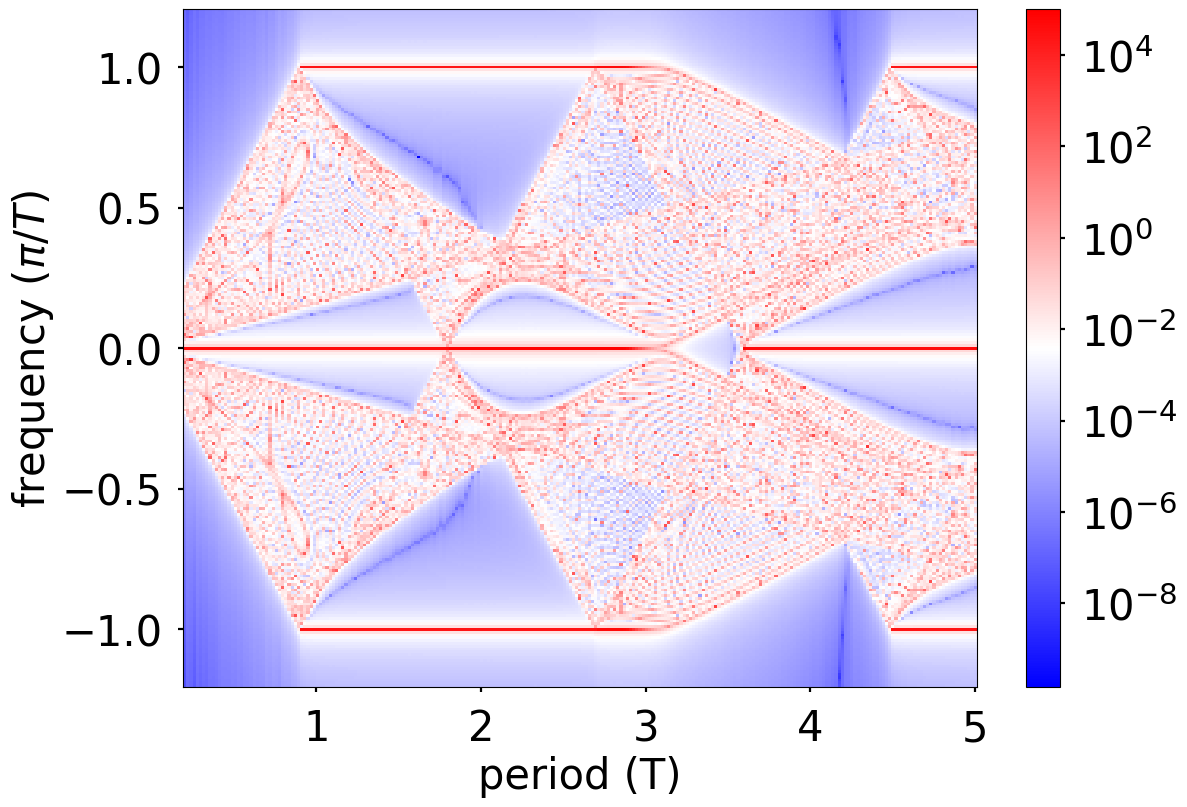

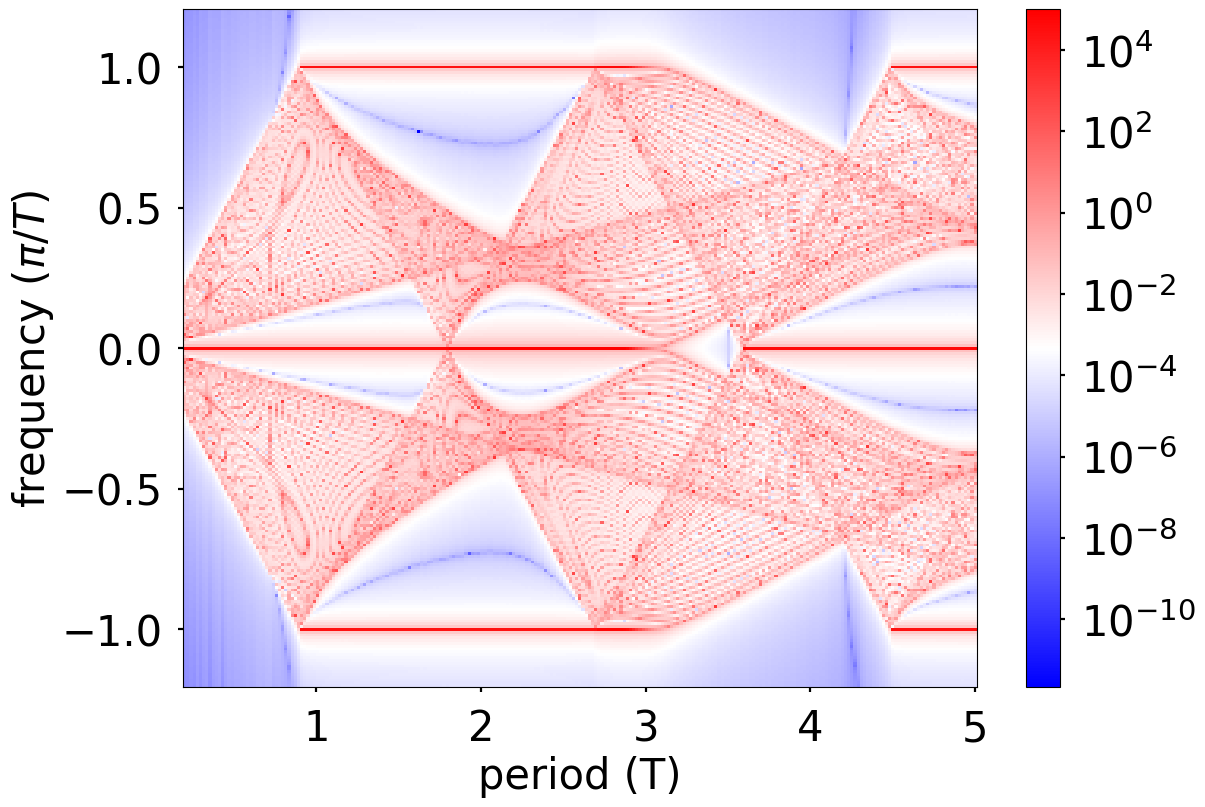

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


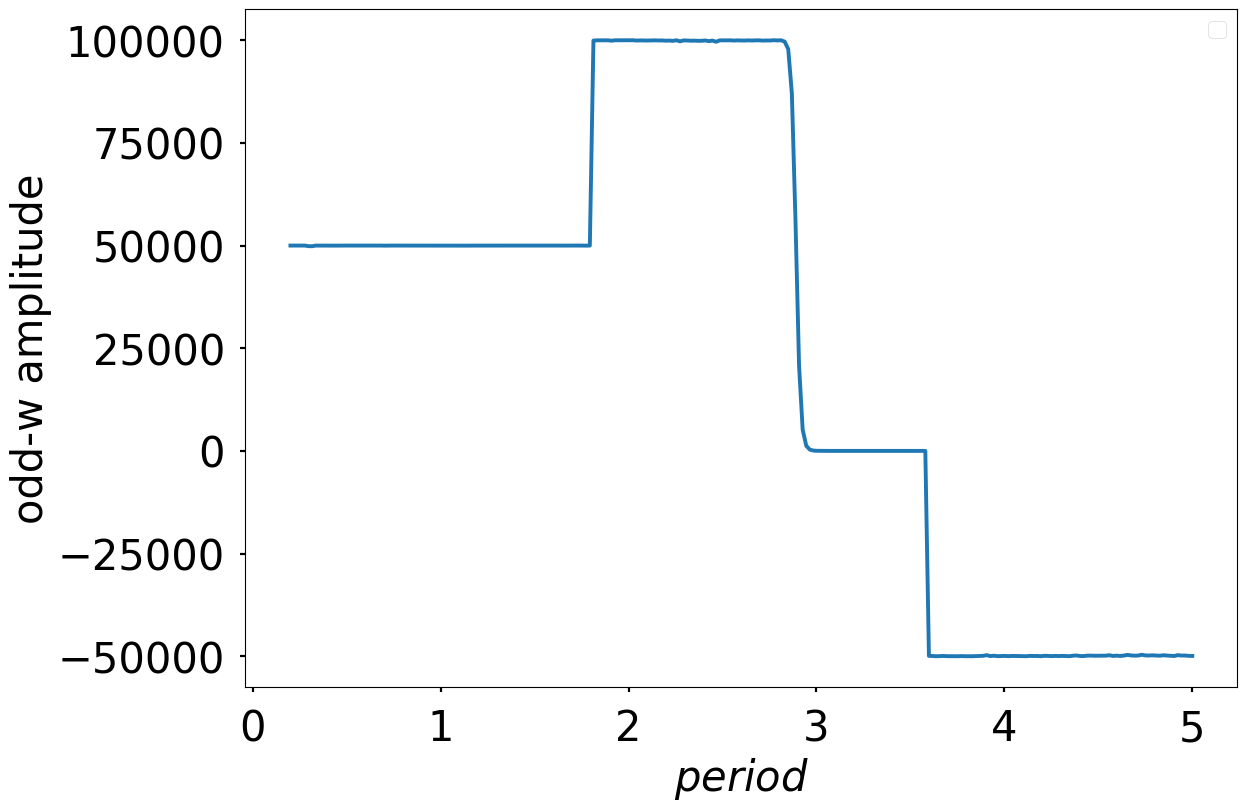

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


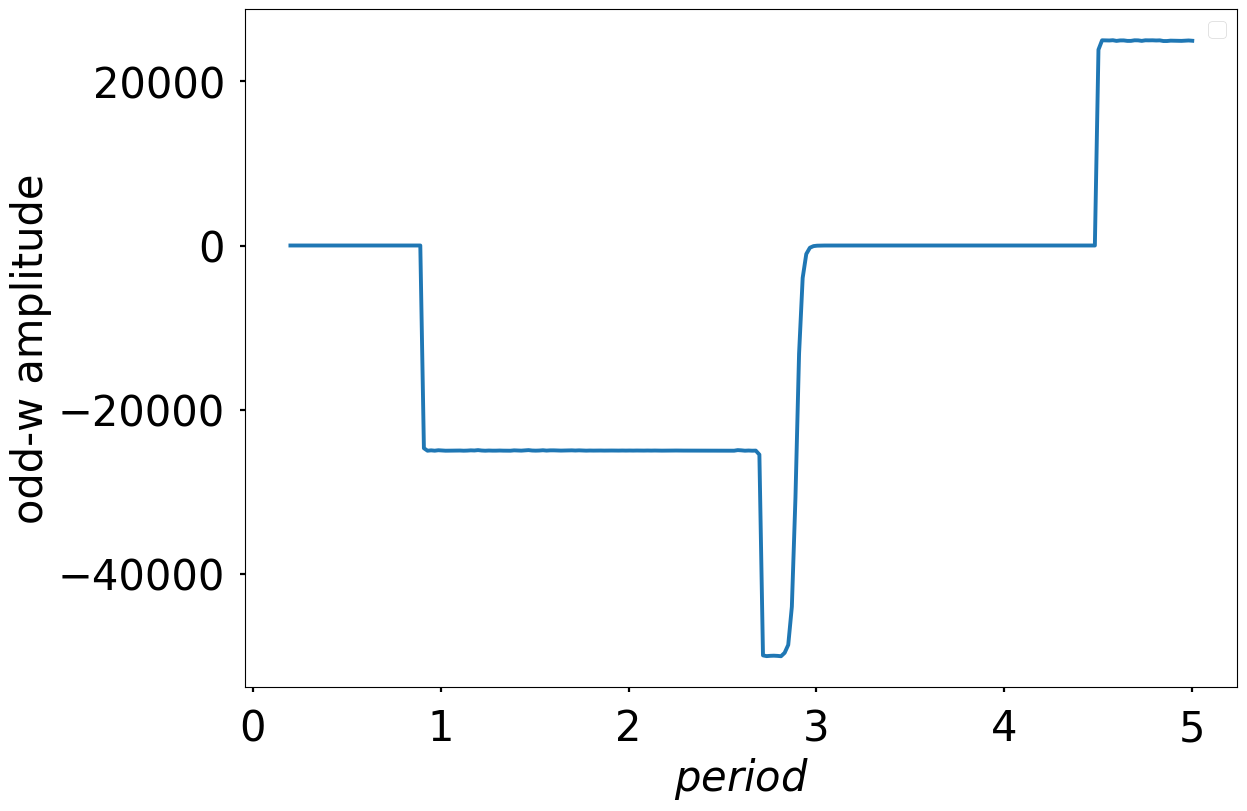

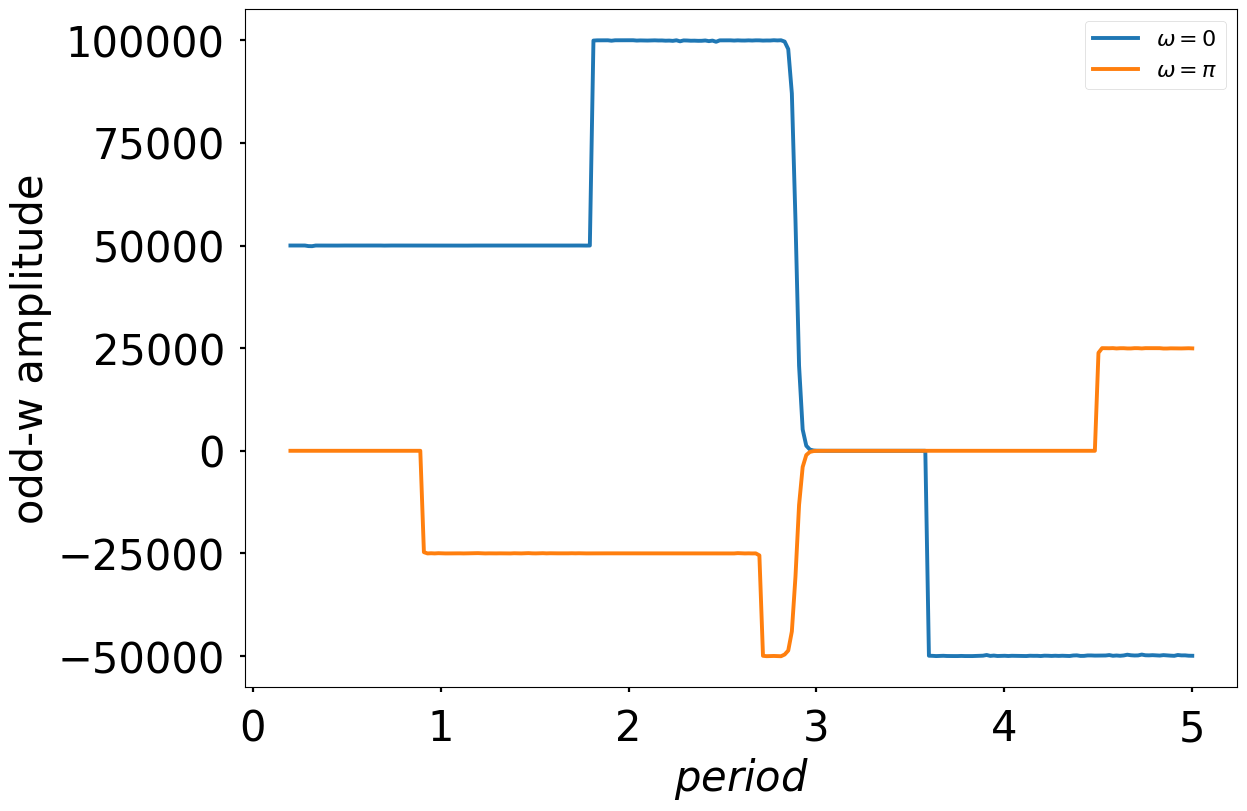

In [27]:
X, Y = np.meshgrid(var_T, var_w)

Z = np.zeros((len(var_w),len(var_T)),dtype=complex)
Z2 = np.zeros((len(var_w),len(var_T)),dtype=complex)
for i in range(len(var_T)):
    for j in range(len(var_w)):
        Z[j,i] = sum([(fs_bulk_odd1[i][j][n]) for n in range(int(np.ceil(N_global/2)))])
        Z2[j,i] = sum([(fs_bulk_odd2[i][j][n]) for n in range(int(np.ceil(N_global/2)))])

fig, ax = plt.subplots( )

# Default norm:
pcm = ax.pcolormesh(X, Y, (np.abs(Z.imag)), cmap='bwr',norm='log')
fig.colorbar(pcm, ax=ax, orientation='vertical')
#ax.set_title('Edge odd-$\omega$ pairing')
ax.set_title('')
ax.set_xlabel('period (T)')
ax.set_ylabel('frequency ($\pi/T$)')

plt.savefig(f"./graphs/odd-w vs period vs frequency-mu1={mu1}t, mu2={mu2}t, delta1={delta1}t, delta2={delta2}t,t1={t1}t,t2={t2}t, N={N_global},gauge1.pdf",bbox_inches = 'tight')
plt.show()


fig, ax = plt.subplots( )

# Default norm:
pcm = ax.pcolormesh(X, Y, (np.abs(Z2.imag)), cmap='bwr',norm='log')
fig.colorbar(pcm, ax=ax, orientation='vertical')
#ax.set_title('Edge odd-$\omega$ pairing')
ax.set_title('')
ax.set_xlabel('period (T)')
ax.set_ylabel('frequency ($\pi/T$)')

plt.savefig(f"./graphs/odd-w vs period vs frequency-mu1={mu1}t, mu2={mu2}t, delta1={delta1}t, delta2={delta2}t,t1={t1}t,t2={t2}t, N={N_global},gauge2.pdf",bbox_inches = 'tight')
plt.show()





plt.title(f"")
plt.plot(var_T,(Z[120,:]).imag)
plt.ylabel('odd-w amplitude')
plt.xlabel('$period$')
#plt.yscale('log')
plt.legend()
plt.savefig(f"./graphs/odd-w vs period at zero frequency-mu1={mu1}t, mu2={mu2}t, delta1={delta1}t, delta2={delta2}t,t1={t1}t,t2={t2}t, N={N_global},gauge2.pdf",bbox_inches = 'tight')
plt.show()

plt.title(f"")
plt.plot(var_T,(Z[220,:]).imag)
plt.ylabel('odd-w amplitude')
plt.xlabel('$period$')
#plt.yscale('log')
plt.legend()
plt.savefig(f"./graphs/odd-w vs period at pi frequency-mu1={mu1}t, mu2={mu2}t, delta1={delta1}t, delta2={delta2}t,t1={t1}t,t2={t2}t, N={N_global},gauge2.pdf",bbox_inches = 'tight')
plt.show()




plt.title(f"")
plt.plot(var_T,(Z[120,:]).imag, label = '$\omega = 0$')
plt.title(f"")
plt.plot(var_T,(Z[220,:]).imag, label = '$\omega = \pi$')
plt.ylabel('odd-w amplitude')
plt.xlabel('$period$')
#plt.yscale('log')
plt.legend()
plt.savefig(f"./graphs/odd-w vs period at zero and pi frequency-mu1={mu1}t, mu2={mu2}t, delta1={delta1}t, delta2={delta2}t,t1={t1}t,t2={t2}t, N={N_global},gauge2.pdf",bbox_inches = 'tight')
plt.show()

In [26]:
var_mu = np.linspace(0,8,151)
var_T = torch.linspace(0.2, 2.5*np.pi, 151)
fs_bulk_odd_zero1 = []
fs_bulk_odd_pi1 = []
fs_bulk_odd_zero2 = []
fs_bulk_odd_pi2 = []





for i in tqdm(range(len(var_mu))):    
    mu2 = var_mu[i] * t 
    h_1 = Hamiltonian(d=d_global, N=N_global, u=onsite(_mu=mu1), v=offsite(_delta=delta1, _t=t1))
    h_2 = Hamiltonian(d=d_global, N=N_global, u=onsite(_mu=mu2), v=offsite(_delta=delta2, _t=t2))
    G_odd_zero_bulk1 = []
    G_odd_zero_bulk2 = []
    G_odd_pi_bulk1 = []
    G_odd_pi_bulk2 = []
    for j in (range(len(var_T))):
        eval1, evec1 = floquet_hamiltonian([(3/4)*h_2.lattice_hamiltonian(), (3/2)*h_1.lattice_hamiltonian(),(3/4)*h_2.lattice_hamiltonian()], T=var_T[j])
        eval2, evec2 = floquet_hamiltonian([(3/4)*h_1.lattice_hamiltonian(), (3/2)*h_2.lattice_hamiltonian(),(3/4)*h_1.lattice_hamiltonian()], T=var_T[j])

        eval1 = eval1.real
        eval2 = eval2.real

        # Convert eval1 and eval2 to PyTorch tensors
        eval1 = torch.tensor(eval1)
        eval2 = torch.tensor(eval2)

        evec1_inv = la.inv(evec1)
        evec2_inv = la.inv(evec2)

        
        #G_even = []
        w = 0
        delta_positive = (w + delta_amount * 1j) 
        delta_negative = (-w - delta_amount * 1j)
        G_pos = torch.diag(1/(delta_positive - eval1))
        G_neg = torch.diag(1/(delta_negative - eval1))
        g = ((evec1 @ (G_pos - G_neg) @ evec1_inv / 2)).cpu().numpy()
        G_odd_zero_bulk1.append([(g[0+n*d_global,1+n*d_global]) for n in range(N_global)])

        G_pos = torch.diag(1/(delta_positive - eval2))
        G_neg = torch.diag(1/(delta_negative - eval2))
        g = ((evec2 @ (G_pos - G_neg) @ evec2_inv / 2)).cpu().numpy()
        G_odd2.append(sum([(g[0+n*d_global,1+n*d_global]) for n in range(int(np.ceil(N_global/2)))]))
        G_odd_zero_bulk2.append([(g[0+n*d_global,1+n*d_global]) for n in range(N_global)])


        w = 1
        delta_positive = (w + delta_amount * 1j) 
        delta_negative = (-w - delta_amount * 1j)
        G_pos = torch.diag(1/(delta_positive - eval1))
        G_neg = torch.diag(1/(delta_negative - eval1))
        g = ((evec1 @ (G_pos - G_neg) @ evec1_inv / 2)).cpu().numpy()
        G_odd_pi_bulk1.append([(g[0+n*d_global,1+n*d_global]) for n in range(N_global)])

        G_pos = torch.diag(1/(delta_positive - eval2))
        G_neg = torch.diag(1/(delta_negative - eval2))
        g = ((evec2 @ (G_pos - G_neg) @ evec2_inv / 2)).cpu().numpy()
        G_odd2.append(sum([(g[0+n*d_global,1+n*d_global]) for n in range(int(np.ceil(N_global/2)))]))
        G_odd_pi_bulk2.append([(g[0+n*d_global,1+n*d_global]) for n in range(N_global)])
        

        '''
        w = 1
        delta_positive = (w + delta_amount * 1j) 
        delta_negative = (-w - delta_amount * 1j)
        delta_positive_2 = (-w - delta_amount * 1j)
        delta_negative_2 = (-w + delta_amount * 1j)
        G_pi_pos = torch.diag(1/(delta_positive - eval1) + 1/(delta_positive_2 - eval1))
        G_pi_neg = torch.diag(1/(delta_negative - eval1) + 1/(delta_negative_2 - eval1))
        g = ((evec1 @ (G_pi_pos - G_pi_neg) @ evec1_inv / 4)).cpu().numpy()
        G_odd_pi_bulk1.append([(g[0+n*d_global,1+n*d_global]) for n in range(N_global)])

        G_pi_pos = torch.diag(1/(delta_positive - eval2) + 1/(delta_positive_2 - eval2))
        G_pi_neg = torch.diag(1/(delta_negative - eval2) + 1/(delta_negative_2 - eval2))
        g = ((evec2 @ (G_pi_pos - G_pi_neg) @ evec2_inv / 4)).cpu().numpy()
        G_odd_pi_bulk2.append([(g[0+n*d_global,1+n*d_global]) for n in range(N_global)])
        '''
            
    
    fs_bulk_odd_zero1.append(G_odd_zero_bulk1)
    fs_bulk_odd_pi1.append(G_odd_pi_bulk1)
    fs_bulk_odd_zero2.append(G_odd_zero_bulk2)
    fs_bulk_odd_pi2.append(G_odd_pi_bulk2)


  0%|          | 0/151 [00:00<?, ?it/s]/tmp/ipykernel_631671/1409075891.py:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  eval1 = torch.tensor(eval1)
/tmp/ipykernel_631671/1409075891.py:29: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  eval2 = torch.tensor(eval2)
100%|██████████| 151/151 [4:13:51<00:00, 100.87s/it]    


In [36]:
var_mu = np.linspace(0,8,151)
N_global = 100
var_T = torch.linspace(0.2, 2.5*np.pi, 151)

In [43]:
np.save('pi1.npy',fs_bulk_odd_pi1)
np.save('zero1.npy',fs_bulk_odd_zero1)
np.save('pi2.npy',fs_bulk_odd_pi2)
np.save('zero2.npy',fs_bulk_odd_zero2)

In [35]:
test = np.array(fs_bulk_odd_pi1)
print(test.shape)
print(var_T.shape)
print(var_mu.shape)
N_global

(151, 151, 100)
torch.Size([151])
torch.Size([201])


100

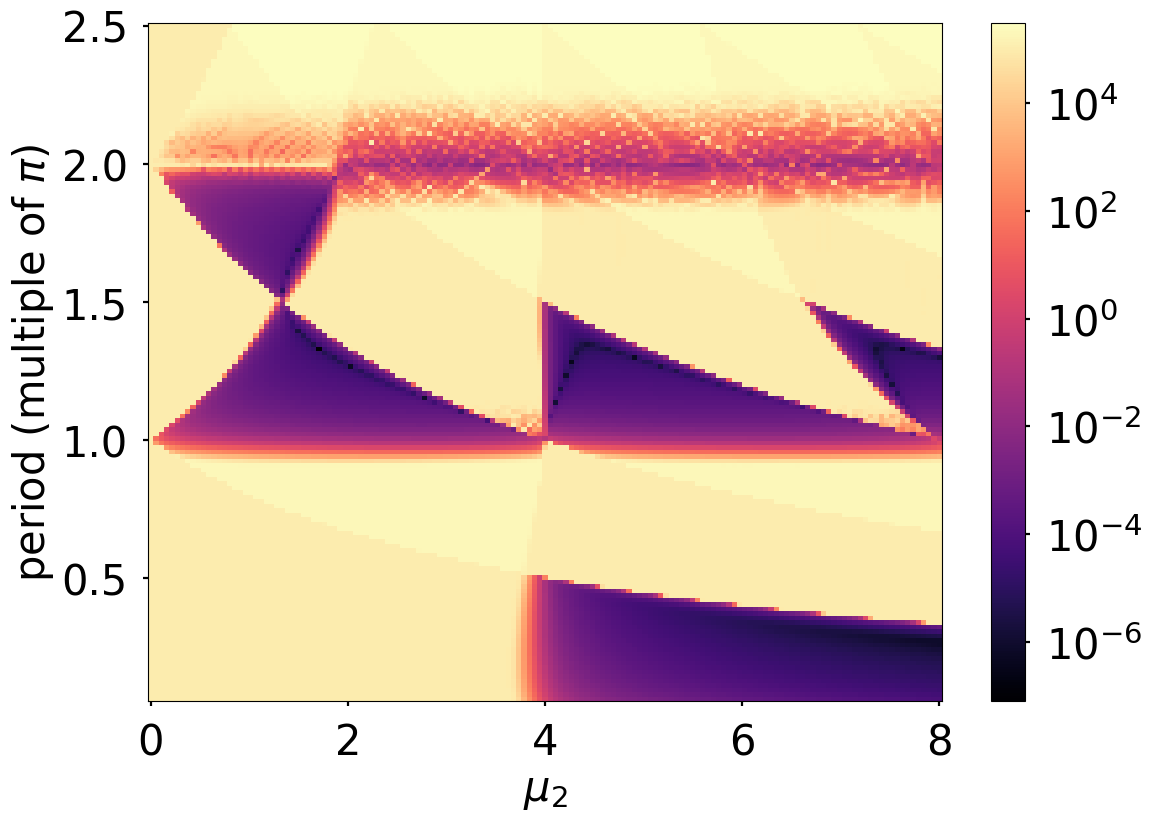

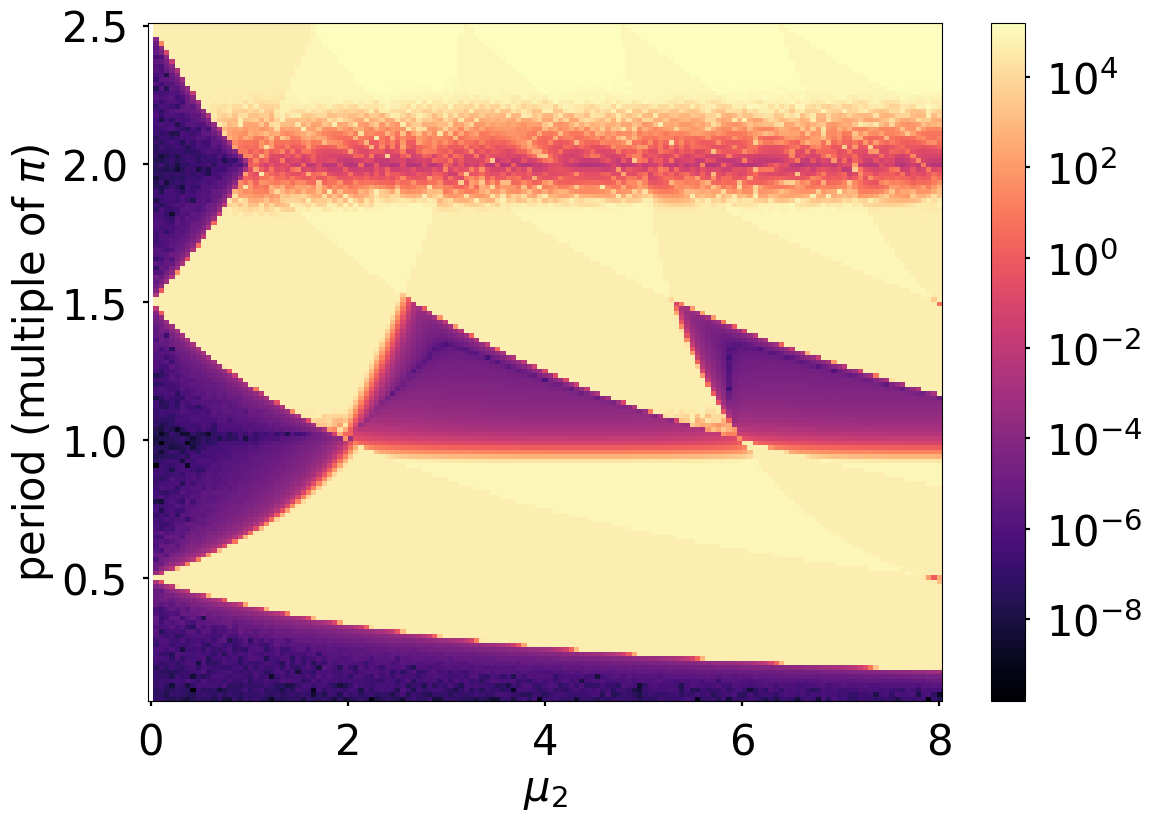

In [44]:
#var_mu = torch.linspace(0,8,201)
X, Y = np.meshgrid(var_mu, var_T)
Z1pi = np.zeros((len(var_T),len(var_mu)),dtype=complex)
Z2pi = np.zeros((len(var_T),len(var_mu)),dtype=complex)
Z1zero = np.zeros((len(var_T),len(var_mu)),dtype=complex)
Z2zero = np.zeros((len(var_T),len(var_mu)),dtype=complex)
trace_limit = int(np.ceil(N_global/2))
#trace_limit = 1
for i in range(len(var_mu)):
    for j in range(len(var_T)):
        Z1pi[j,i] = sum([(fs_bulk_odd_pi1[i][j][n]) for n in range(trace_limit)])
        Z2pi[j,i] = sum([(fs_bulk_odd_pi2[i][j][n]) for n in range(trace_limit)])
        Z1zero[j,i] = sum([(fs_bulk_odd_zero1[i][j][n]) for n in range(trace_limit)])
        Z2zero[j,i] = sum([(fs_bulk_odd_zero2[i][j][n]) for n in range(trace_limit)])

fig, ax = plt.subplots()

# Default norm:
pcm = ax.pcolormesh(X, Y/np.pi, np.abs(((Z1zero+Z2zero).imag)), cmap='magma',norm='log')
fig.colorbar(pcm, ax=ax, orientation='vertical')
ax.set_title('')
ax.set_xlabel('$\mu_2$')
ax.set_ylabel('period (multiple of $\pi$)')
plt.savefig(f"./graphs/odd-w zero energy vs period vs mu2-mu1={mu1}t, delta1={delta1}t, delta2={delta2}t,t1={t1}t,t2={t2}t, N={N_global},zero-projection.pdf",bbox_inches = 'tight')
plt.show()


fig, ax = plt.subplots()
pcm = ax.pcolormesh(X, Y/np.pi, (np.abs((Z1pi-Z2pi).imag)), cmap='magma',norm='log')
fig.colorbar(pcm, ax=ax, orientation='vertical')
ax.set_title('')
ax.set_xlabel('$\mu_2$')
ax.set_ylabel('period (multiple of $\pi$)')
plt.savefig(f"./graphs/odd-w pi energy vs period vs mu2-mu1={mu1}t, delta1={delta1}t, delta2={delta2}t,t1={t1}t,t2={t2}t, N={N_global},pi-projection.pdf",bbox_inches = 'tight')
plt.show()

In [21]:
for i,j in enumerate(var_T):
    print(i,j)

0 tensor(0.2000)
1 tensor(0.2192)
2 tensor(0.2384)
3 tensor(0.2576)
4 tensor(0.2768)
5 tensor(0.2960)
6 tensor(0.3152)
7 tensor(0.3344)
8 tensor(0.3536)
9 tensor(0.3728)
10 tensor(0.3920)
11 tensor(0.4112)
12 tensor(0.4304)
13 tensor(0.4496)
14 tensor(0.4688)
15 tensor(0.4880)
16 tensor(0.5072)
17 tensor(0.5264)
18 tensor(0.5456)
19 tensor(0.5648)
20 tensor(0.5840)
21 tensor(0.6032)
22 tensor(0.6224)
23 tensor(0.6416)
24 tensor(0.6608)
25 tensor(0.6800)
26 tensor(0.6992)
27 tensor(0.7184)
28 tensor(0.7376)
29 tensor(0.7568)
30 tensor(0.7760)
31 tensor(0.7952)
32 tensor(0.8144)
33 tensor(0.8336)
34 tensor(0.8528)
35 tensor(0.8720)
36 tensor(0.8912)
37 tensor(0.9104)
38 tensor(0.9296)
39 tensor(0.9488)
40 tensor(0.9680)
41 tensor(0.9872)
42 tensor(1.0064)
43 tensor(1.0256)
44 tensor(1.0448)
45 tensor(1.0640)
46 tensor(1.0832)
47 tensor(1.1024)
48 tensor(1.1216)
49 tensor(1.1408)
50 tensor(1.1600)
51 tensor(1.1792)
52 tensor(1.1984)
53 tensor(1.2176)
54 tensor(1.2368)
55 tensor(1.2560)
56

In [28]:
fs_odd1 = []
fs_bulk_odd1 = []
fs_odd2 = []
fs_bulk_odd2 = []
energiesv2 = []
delta_amount =  1E-5
#delta_amount = 0.001
#var_T = [0.5, 1.5, 2.3, 2.8, 4.7] #for mu2 = 3
var_T = [0.9, 1.5, 2, 2.8, 4.5] #for mu2 = 6.5

for j in tqdm(range(len(var_T))):
    eval1, evec1 = floquet_hamiltonian([(3/4)*h_2.lattice_hamiltonian(), (3/2)*h_1.lattice_hamiltonian(),(3/4)*h_2.lattice_hamiltonian()], T=var_T[j])

    eval1 = eval1.real

    evec1_inv = la.inv(evec1)

    G_odd1 = []
    G_odd_bulk1 = []
    G_odd2 = []
    G_odd_bulk2 = []

    for w in (var_w):
        delta_positive = ((w + delta_amount) * 1j) 
        delta_negative = ((-w - delta_amount) * 1j)

        G_pos = torch.diag(1/(delta_positive - eval1))
        G_neg = torch.diag(1/(delta_negative - eval1))
        g = ((evec1 @ (G_pos - G_neg) @ evec1_inv / 2)).cpu().numpy()
        G_odd1.append(sum([np.trace(s_x_np@g[n*d_global:(n+1)*d_global,n*d_global:(n+1)*d_global]) for n in range(int(np.ceil(N_global/2)))]))
        G_odd_bulk1.append([(g[0+n*d_global,1+n*d_global]) for n in range(N_global)])
        #G_odd_bulk1.append([(g[n*d_global:(n+1)*d_global,n*d_global:(n+1)*d_global]) for n in range(N_global)])

        delta_positive = (1+(w + delta_amount) * 1j) 
        delta_negative = (-1+(-w - delta_amount) * 1j)

        G_pos = torch.diag(1/(delta_positive - eval1))
        G_neg = torch.diag(1/(delta_negative - eval1))
        g = ((evec1 @ (G_pos - G_neg) @ evec1_inv / 2)).cpu().numpy()
        G_odd2.append(sum([np.trace(s_x_np@g[n*d_global:(n+1)*d_global,n*d_global:(n+1)*d_global]) for n in range(int(np.ceil(N_global/2)))]))
        G_odd_bulk2.append([(g[0+n*d_global,1+n*d_global]) for n in range(N_global)])
        #G_odd_bulk2.append([(g[n*d_global:(n+1)*d_global,n*d_global:(n+1)*d_global]) for n in range(N_global)])
            
    #Gs_even.append(G_even)
    fs_odd1.append(G_odd1)
    fs_bulk_odd1.append(G_odd_bulk1)
    fs_odd2.append(G_odd2)
    fs_bulk_odd2.append(G_odd_bulk2)
    #modes_ind,cnt_modes = check_modes(eval, 0)
    #zero_modes_nums.append(cnt_modes)
    #modes_ind,cnt_modes = check_modes(eval, 1)
    #pi_modes_nums.append(cnt_modes)
    pass


100%|██████████| 5/5 [00:04<00:00,  1.22it/s]


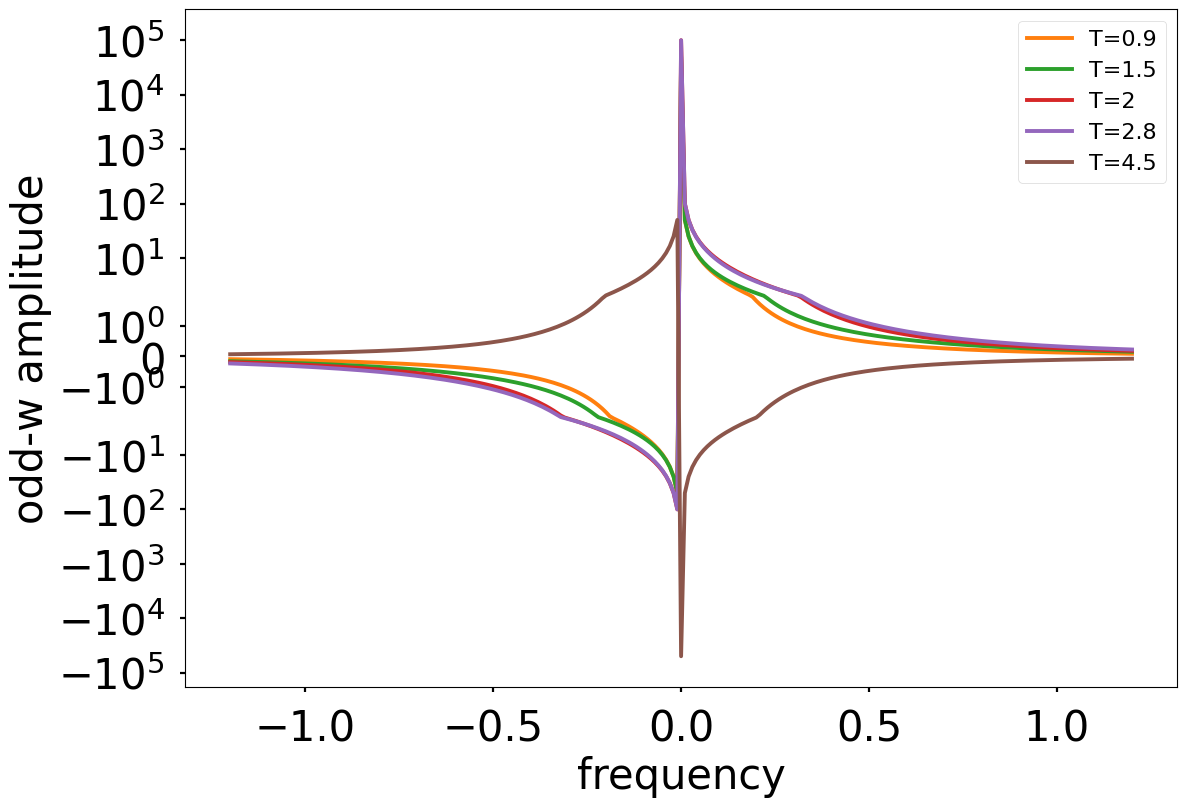

hi


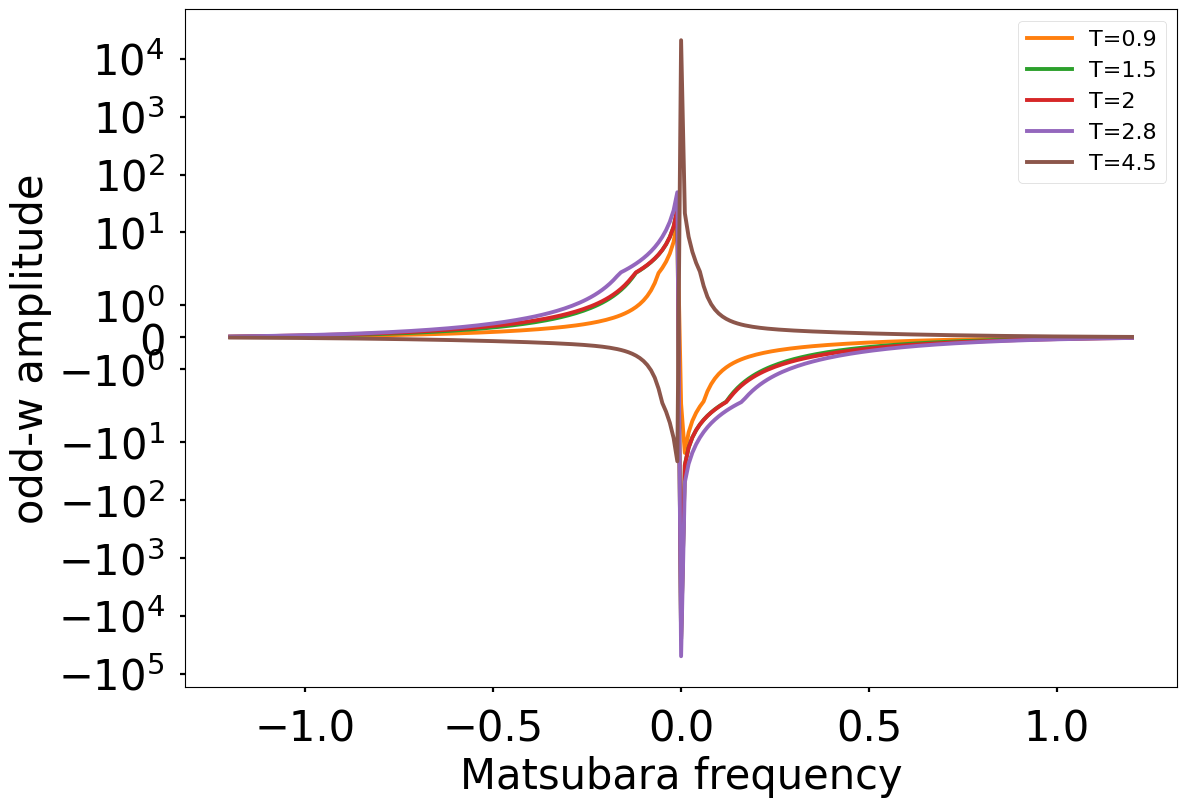

In [29]:
X, Y = np.meshgrid(var_T, var_w)

Z = np.zeros((len(var_w),len(var_T)),dtype=complex)
Z2 = np.zeros((len(var_w),len(var_T)),dtype=complex)
for i in range(len(var_T)):
    for j in range(len(var_w)):
        Z[j,i] = sum([(fs_bulk_odd1[i][j][n]) for n in range(int(np.ceil(N_global/2)))])
        Z2[j,i] = sum([(fs_bulk_odd2[i][j][n]) for n in range(int(np.ceil(N_global/2)))])



colors = ['C1','C2','C3','C4','C5','C6','C7','C8']

plt.title(f"",color = 'C0')
for j in range(len(var_T)):
    f_odd = np.array([(Z[i][j]) for i in range(len(var_w))])
    plt.plot(var_w,(f_odd).imag, colors[j], label=f'T={var_T[j]}')
plt.ylabel('odd-w amplitude')
plt.xlabel('frequency')
plt.yscale('symlog')
plt.legend()
plt.savefig(f"./graphs/odd-w near zero vs matsubara frequency-mu1={mu1}t, mu2={mu2}t, delta1={delta1}t, delta2={delta2}t,t1={t1}t,t2={t2}t, N={N_global},gauge1.pdf",bbox_inches = 'tight')
plt.show()

print('hi')
plt.title(f"",color = 'C0')
for j in range(len(var_T)):
    f_odd = np.array([(Z2[i][j].imag) for i in range(len(var_w))])
    #p = np.poly1d(np.polyfit(var_w,np.log(np.abs(f_odd)),600))
    #f_odd = np.array([(fs_bulk_odd1[j][i][0]) for i in range(len(var_w))])
    plt.plot(var_w,(f_odd), colors[j], label=f'T={var_T[j]}')
    #plt.plot(var_w,np.exp(p(var_w)), label=f'T={var_T[j]}')
plt.ylabel('odd-w amplitude')
plt.xlabel('Matsubara frequency')
plt.yscale('symlog')
plt.legend()
plt.savefig(f"./graphs/odd-w near pi vs matsubara frequency-mu1={mu1}t, mu2={mu2}t, delta1={delta1}t, delta2={delta2}t,t1={t1}t,t2={t2}t, N={N_global},gauge1.pdf",bbox_inches = 'tight')
plt.show()

In [30]:
var_w[120]

tensor(-3.7253e-08)

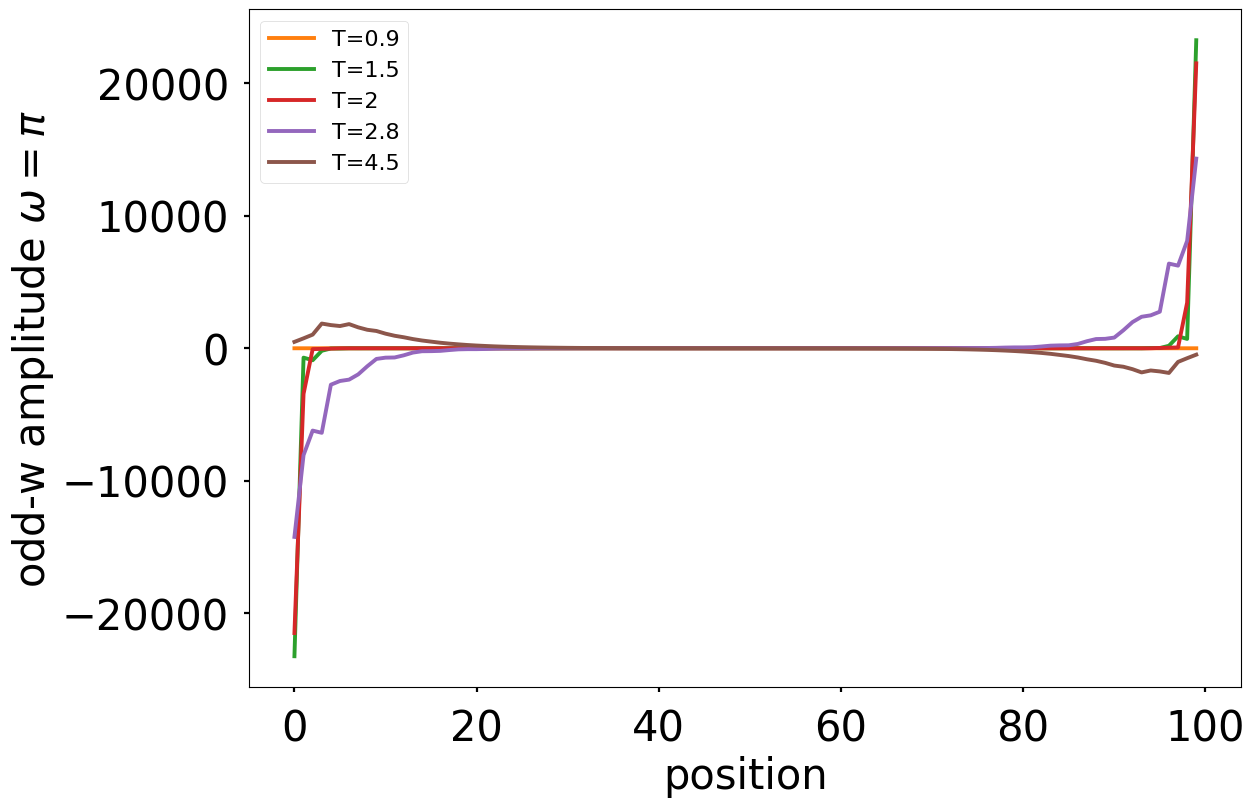

tensor(-0.7000)


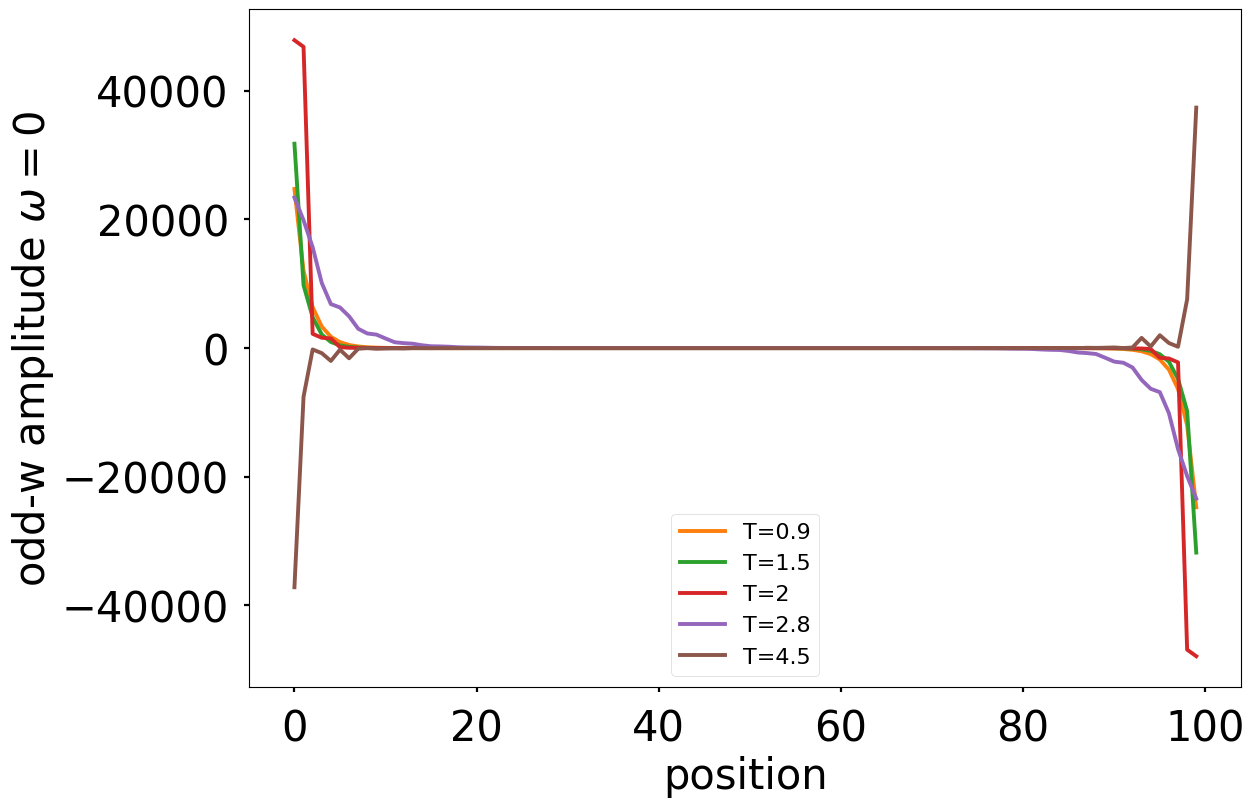

In [31]:
colors = ['C1','C2','C3','C4','C5','C6','C7','C8']

plt.title(f"", color = 'C0')
for j in range(len(var_T)):
    f_odd = np.array((fs_bulk_odd2[j][120]))
    plt.plot((f_odd.imag), colors[j], label=f'T={var_T[j]}')
plt.ylabel('odd-w amplitude $\omega = \pi$')
plt.xlabel('position')
#plt.yscale('symlog')
plt.legend()
plt.savefig(f"./graphs/odd-w at pi vs space-mu1={mu1}t, mu2={mu2}t, delta1={delta1}t, delta2={delta2}t,t1={t1}t,t2={t2}t, N={N_global},gauge2.pdf",bbox_inches = 'tight')
plt.show()

print(var_w[50])
plt.title(f"")
for j in range(len(var_T)):
    f_odd = np.array((fs_bulk_odd1[j][120]))
    #f_odd = np.array([(fs_bulk_odd1[j][i][0]) for i in range(len(var_w))])
    plt.plot((f_odd.imag), colors[j], label=f'T={var_T[j]}')
plt.ylabel('odd-w amplitude $\omega = 0$')
plt.xlabel('position')
#plt.yscale('symlog')
plt.legend()
plt.savefig(f"./graphs/odd-w vs at zero vs space-mu1={mu1}t, mu2={mu2}t, delta1={delta1}t, delta2={delta2}t,t1={t1}t,t2={t2}t, N={N_global},gauge2.pdf",bbox_inches = 'tight')
plt.show()

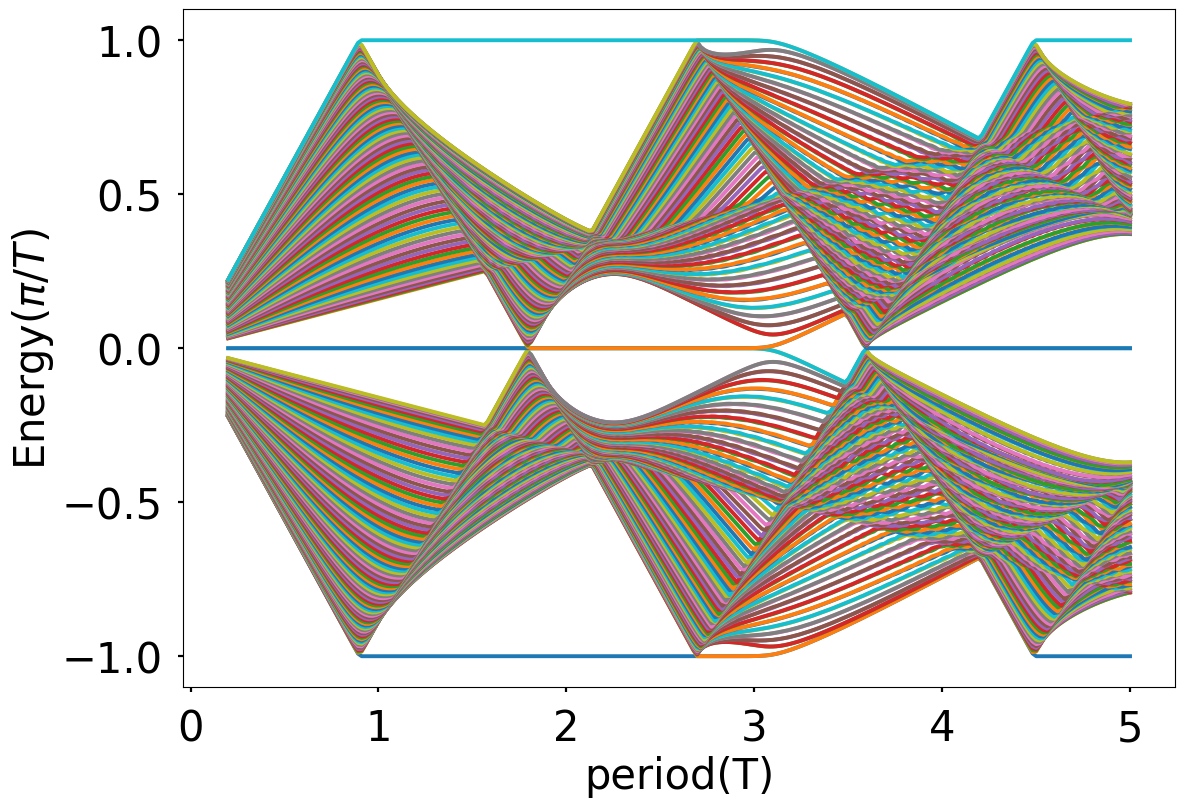

In [68]:
energiesv2 = np.array(energiesv2)
plt.title(f"")
for i in range(2*N_global):
    #plt.plot(var_T,energies[:,i]/np.pi)
    plt.plot(var_T[:],energiesv2[:,i])
plt.ylabel('Energy($\pi/T$)')
plt.xlabel('period(T)')
plt.yticks([-1,-0.5,0,0.5,1])
plt.savefig(f'spectrum-mu1={mu1}t,mu2={mu2}t,delta={delta1}t,N={N_global}.pdf',bbox_inches = 'tight')
plt.show()

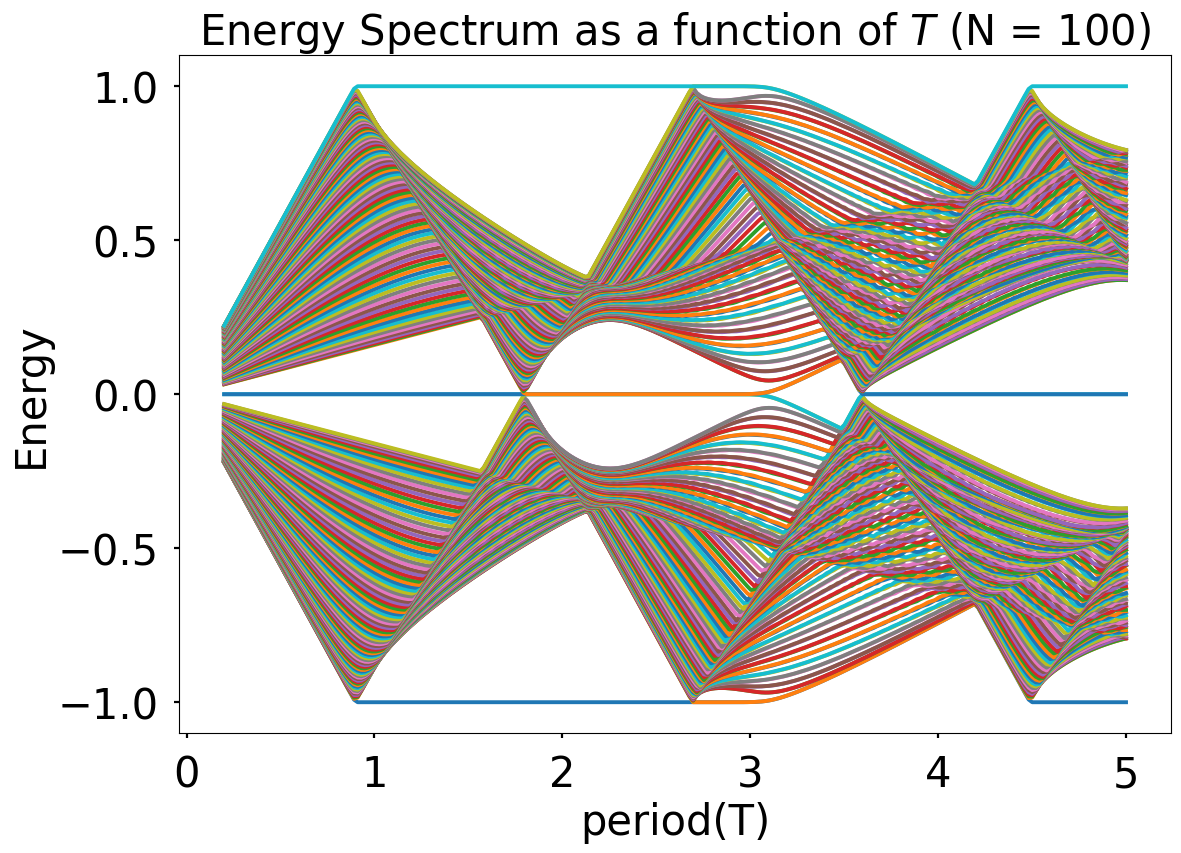

In [62]:
energiesv2 = np.array(energiesv2)
plt.title(f"Energy Spectrum as a function of $T$ (N = {N_global})")
for i in range(2*N_global):
    #plt.plot(var_T,energies[:,i]/np.pi)
    plt.plot(var_T[:],energiesv2[:,i])
plt.ylabel('Energy')
plt.xlabel('period(T)')
plt.show()